# Chapter 9: Misinformation Spreading, Simulation on a Graph

### Import libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Basic networkx example

In [2]:
G = nx.Graph()

In [3]:
G.add_edge(1, 2)

In [4]:
G.number_of_nodes()

2

In [5]:
G.nodes

NodeView((1, 2))

In [6]:
G.edges

EdgeView([(1, 2)])

In [7]:
G.adj.get(2)

AtlasView({1: {}})

### Basic visualization example

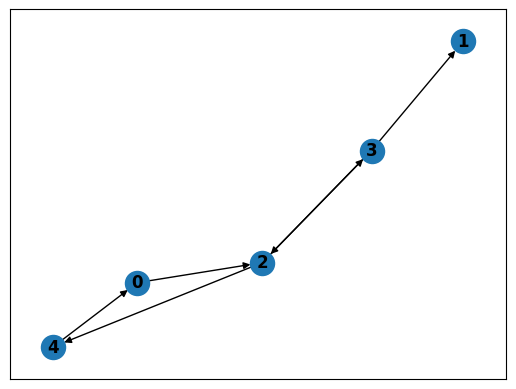

In [8]:
fig, ax = plt.subplots()
sg = nx.fast_gnp_random_graph(n=5,p=0.2, seed = 3, directed = True)
pos=nx.spring_layout(sg,seed=5)
nx.draw_networkx_nodes(sg, pos, ax=ax)
nx.draw_networkx_labels(sg, pos, ax=ax, font_weight='bold')
nx.draw_networkx_edges(sg, pos, ax=ax, 
                       edgelist= sg.edges());

### Misinformation spreading example

In [9]:
from enum import Enum

In [10]:
class State(Enum):
    SOURCE = 0
    SUSCEPTIBLE = 1
    INFECTED = 2
    RECOVERED = 3

STATE2COLOR = {
    State.SOURCE: "red",
    State.SUSCEPTIBLE: "grey",
    State.INFECTED: "orange",
    State.RECOVERED: "green"
}
    

### Intialize the graph and visualize it

In [11]:
sg = nx.fast_gnp_random_graph(n=5,p=0.2, seed = 3, directed = True)
np.random.seed(1)
for node in sg.nodes:
    sg.nodes[node]["influence"] = len(list(sg.neighbors(node)))
    if node == 4:
        sg.nodes[node]["state"] = State.SOURCE
        sg.nodes[node]["resistance"] = None
    else:
        sg.nodes[node]["state"] = State.SUSCEPTIBLE
        sg.nodes[node]["resistance"] = np.random.random()

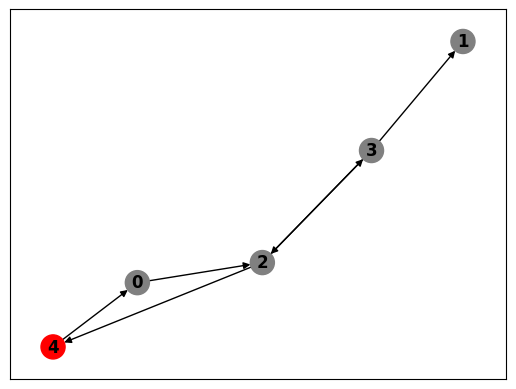

In [12]:
fig, ax = plt.subplots()
node_color=[STATE2COLOR[sg.nodes[node]["state"]] for node in sg.nodes]
nx.draw_networkx_nodes(sg, pos, ax=ax, node_color = node_color)
nx.draw_networkx_labels(sg, pos, ax=ax, font_weight='bold')
nx.draw_networkx_edges(sg, pos, ax=ax, 
                       edgelist= sg.edges());

### State update function

In [13]:
def update_state(sg, sg_copy, node):
    # update states in sg_copy to achieve simultaneous updates
    successors = set(sg.neighbors(node))
    predecessors = set(nx.all_neighbors(sg,node)) - successors
    state = sg.nodes[node]["state"]
    if state == State.SOURCE:
        return
    elif state == State.RECOVERED:
        if sg.nodes[node]["resistance"] > np.random.random():
            sg.nodes[node]["resistance"] = min(sg.nodes[node]["resistance"]*2,
                                               sg.nodes[node]["resistance"] + np.random.random(),
                                              1)
        else:
            sg_copy.nodes[node][state] = State.SUSCEPTIBLE
    elif state == State.SUSCEPTIBLE:
        source_influenced = State.SOURCE in [sg_copy.nodes[pre]["state"] for pre in predecessors]
        infected_influenced = State.INFECTED in [sg_copy.nodes[pre]["state"] for pre in predecessors] 
        if source_influenced or infected_influenced:
            if sg.nodes[node]["resistance"] < np.random.random():
                sg_copy.nodes[node]["state"] = State.INFECTED
    elif state == State.INFECTED:
        # infected has a chance to become recovered
        if sg.nodes[node]["resistance"] > np.random.random():
            sg_copy.nodes[node]["state"] = State.RECOVERED
        else:
            sg.nodes[node]["resistance"] = max(sg.nodes[node]["resistance"]/2,
                                               sg.nodes[node]["resistance"] - np.random.random())
    else:
        print("Unsupported state, exit.")

### Run the simulation

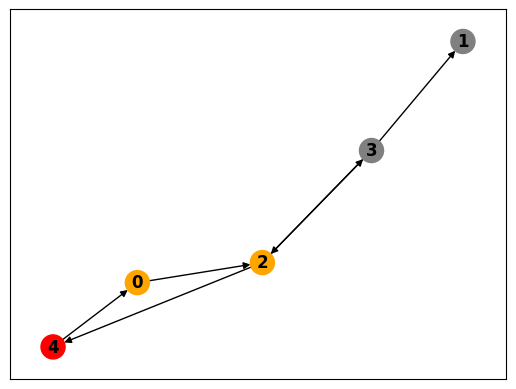

In [14]:
for _ in range(20):
    sg_copy = sg.copy()
    for node in sg.nodes:
        update_state(sg, sg_copy, node)
    # copy state
    for node in sg.nodes:
        sg.nodes[node]["state"] = sg_copy.nodes[node]["state"]        

fig, ax = plt.subplots()
node_color=[STATE2COLOR[sg.nodes[node]["state"]] for node in sg.nodes]
nx.draw_networkx_nodes(sg, pos, ax=ax, 
                       node_color = node_color)
nx.draw_networkx_labels(sg, pos, ax=ax, 
                        font_weight='bold')
nx.draw_networkx_edges(sg, pos, ax=ax, 
                       edgelist= sg.edges());

### Baisc misinformation spread simulation #2

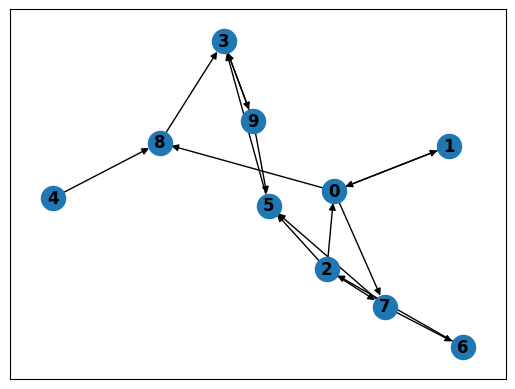

In [15]:
fig, ax = plt.subplots()
sg = nx.fast_gnp_random_graph(n=10, p=0.15, seed = 1, directed = True)
pos=nx.spring_layout(sg,seed=4)
nx.draw_networkx_nodes(sg, pos, ax=ax)
nx.draw_networkx_labels(sg, pos, ax=ax, font_weight='bold')
nx.draw_networkx_edges(sg, pos, ax=ax, 
                       edgelist= sg.edges());

### Initialize the graph and run the simulation

In [16]:
np.random.seed(3)
for node in sg.nodes:
    sg.nodes[node]["influence"] = len(list(sg.neighbors(node)))
    if node == 6 or node == 4:
        sg.nodes[node]["state"] = State.SOURCE
        sg.nodes[node]["resistance"] = None
    else:
        sg.nodes[node]["state"] = State.SUSCEPTIBLE
        sg.nodes[node]["resistance"] = np.random.random()

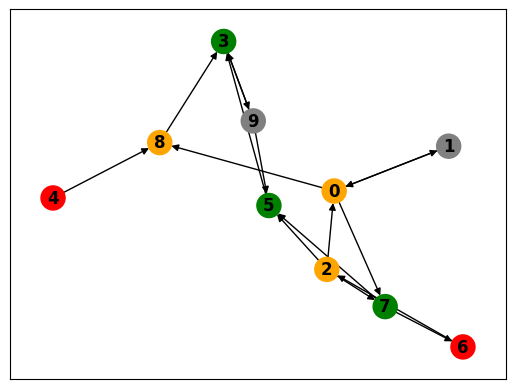

In [17]:
for _ in range(20):
    sg_copy = sg.copy()
    for node in sg.nodes:
        update_state(sg, sg_copy, node)
    # copy state
    for node in sg.nodes:
        sg.nodes[node]["state"] = sg_copy.nodes[node]["state"]        

fig, ax = plt.subplots()
node_color=[STATE2COLOR[sg.nodes[node]["state"]] for node in sg.nodes]
nx.draw_networkx_nodes(sg, pos, ax=ax, 
                       node_color = node_color)
nx.draw_networkx_labels(sg, pos, ax=ax, 
                        font_weight='bold')
nx.draw_networkx_edges(sg, pos, ax=ax, 
                       edgelist= sg.edges());

## Degree distribution

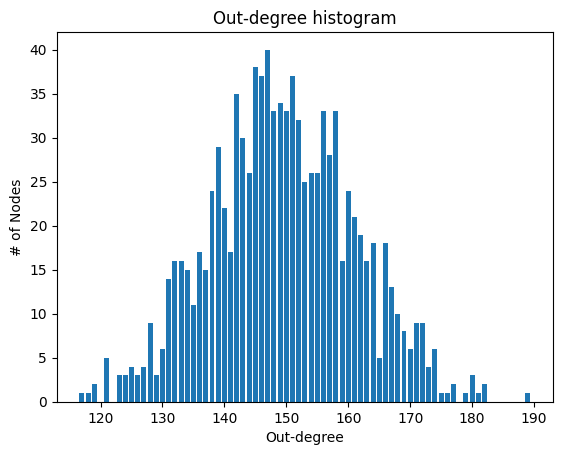

In [18]:
fig, ax = plt.subplots()
bg = nx.fast_gnp_random_graph(n=1000, p=0.15, seed = 1, directed = True)
degree_sequence = sorted((d for n, d in bg.out_degree()), reverse=True)
ax.bar(*np.unique(degree_sequence, return_counts=True))
ax.set_title("Out-degree histogram")
ax.set_xlabel("Out-degree")
ax.set_ylabel("# of Nodes");

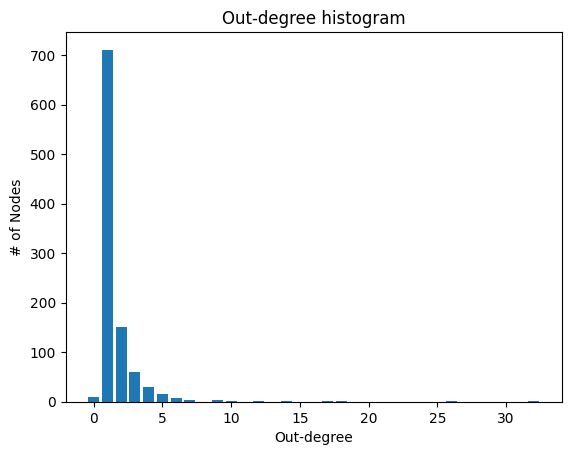

In [19]:
fig, ax = plt.subplots()
g = nx.scale_free_graph(1000, alpha = 0.6, beta = 0.39, gamma = 0.01, seed = 0)
degree_sequence = sorted((d for n, d in g.out_degree()), reverse=True)
ax.bar(*np.unique(degree_sequence, return_counts=True))
ax.set_title("Out-degree histogram")
ax.set_xlabel("Out-degree")
ax.set_ylabel("# of Nodes");

### Visualizations of two types of graphs

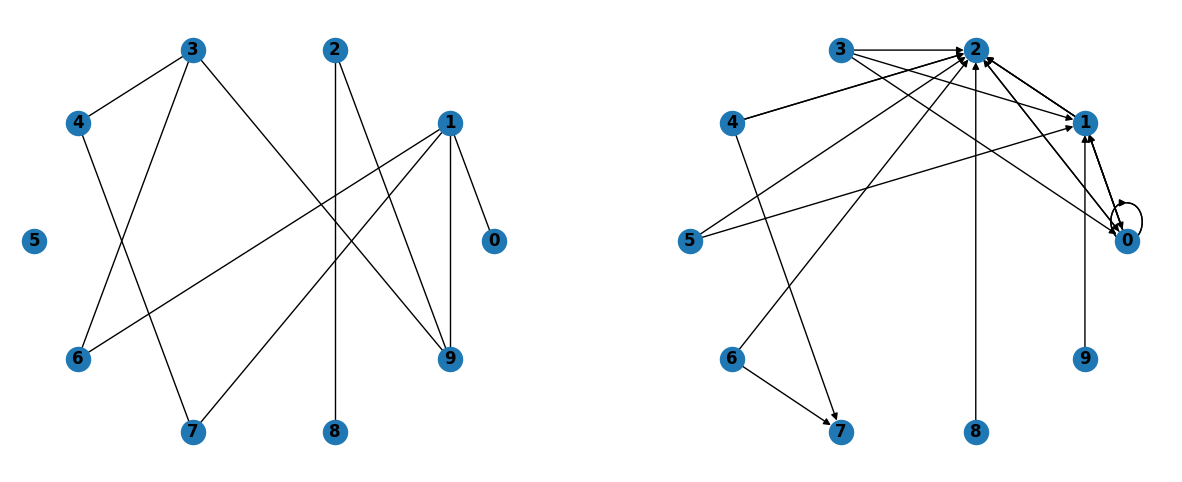

In [20]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
G = nx.fast_gnp_random_graph(n=10, p =0.2, seed = 1)
pos=nx.circular_layout(G)
nx.draw(G, with_labels=True, font_weight='bold', pos = pos, ax = axes[0])
G = nx.scale_free_graph(10)
pos=nx.circular_layout(G)
nx.draw(G, with_labels=True, font_weight='bold', pos = pos, ax = axes[1])

#### Helpful function

In [21]:
from collections import Counter
def count_states(g):
    states = [g.nodes[node]["state"] for node in g.nodes]
    return Counter(states)

### Simulation for comparison

#### Helper functions

In [22]:
def initialize(g, top_k = 5):
    tops = sorted(( (n, d) for n, d in g.out_degree()), reverse=True, 
                  key = lambda pair: pair[1])[:top_k]
    for node in g.nodes:
        g.nodes[node]["influence"] = len(list(g.neighbors(node)))
        if node in [pair[0] for pair in tops]:
            g.nodes[node]["state"] = State.SOURCE
            g.nodes[node]["resistance"] = None
        else:
            g.nodes[node]["state"] = State.SUSCEPTIBLE
            g.nodes[node]["resistance"] = np.random.random()

def simulate(g, steps = 100, top_k = 5):
    initialize(g, top_k)
    res = []
    for _ in range(steps):
        g_copy = g.copy()
        for node in g.nodes:
            update_state(g, g_copy, node)
        # copy state
        for node in g.nodes:
            g.nodes[node]["state"] = g_copy.nodes[node]["state"]
        res.append(count_states(g))
    return res

def visualize(res):
    steps = range(1, len(res) + 1)
    susceptible = [r.get(State.SUSCEPTIBLE,0) for r in res]
    recovered = [r.get(State.RECOVERED,0) for r in res]
    infected = [r.get(State.INFECTED,0) for r in res]
    fig, ax = plt.subplots()
    ax.plot(steps, susceptible, label="susceptible")
    ax.plot(steps, recovered, label="recovered")
    ax.plot(steps, infected, label="infected")
    plt.legend()

In [23]:
g_scale_free = nx.scale_free_graph(1000, 
                                   alpha = 0.5, 
                                   beta = 0.1, 
                                   gamma = 0.4, 
                                   delta_out = 0.9)
g_normal = nx.fast_gnp_random_graph(n=1000, 
                                    p=0.0012, 
                                    seed = 1, 
                                    directed = True)

Check the number of edges.

In [24]:
len(g_scale_free.edges), len(g_normal.edges)

(1121, 1177)

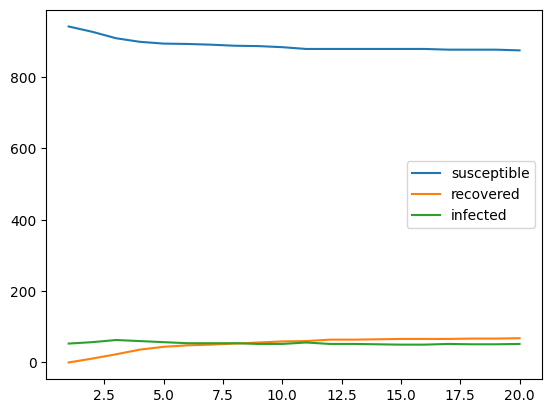

In [25]:
g_scale_free = nx.scale_free_graph(1000, alpha = 0.5, beta = 0.1, gamma = 0.4, delta_out = 0.9)
res = simulate(g_scale_free, steps = 20,  top_k = 5)
visualize(res)

Check top influencers' neighbors' follower counting.

In [26]:
tops = sorted(((n, d) for n, d in g_scale_free.out_degree()), reverse=True, 
                  key = lambda pair: pair[1])[:5]

In [27]:
[g_scale_free.out_degree()[k] for k in list(nx.neighbors(g_scale_free,2))]

[19, 1, 1, 0, 9, 0, 0, 0, 0, 0]

### Early stop simulation.

Note that this may take long time.

In [28]:
def simulate(g, steps = 100, top_k = 5):
    initialize(g, top_k)
    res = []
    for _ in range(steps):
        g_copy = g.copy()
        for node in g.nodes:
            update_state(g, g_copy, node)
        # copy state
        for node in g.nodes:
            g.nodes[node]["state"] = g_copy.nodes[node]["state"]
        if len(res) > 1 and res[-2] == res[-1] == count_states(g):
            return res
        res.append(count_states(g))
    return res

for p in [0.001,0.002, 0.004, 0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.4]:
    for _ in range(1000):
        len_res = []
        infected_rate = []
        recovered_rate = []
        g_normal = nx.fast_gnp_random_graph(n=100, p=p, directed = True)
        res = simulate(g_normal, steps = 1000,  top_k = 5)
        len_res.append(len(res))
        infected_rate.append(res[-1][State.INFECTED]/100)
        recovered_rate.append(res[-1][State.RECOVERED]/100)
    print(p, np.mean(len_res), np.mean(infected_rate), np.mean(recovered_rate))

0.001 6.0 0.02 0.03
0.002 5.0 0.02 0.04
0.004 9.0 0.02 0.07
0.01 9.0 0.13 0.1
0.02 14.0 0.18 0.37
0.04 14.0 0.33 0.46
0.08 15.0 0.35 0.58
0.1 10.0 0.33 0.55
0.2 19.0 0.33 0.59
0.4 15.0 0.3 0.6
